## *进行数据预处理*
### *导入模块*

In [19]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

### *读取MNIST数据*

In [21]:
path =r'.\mnist.npz'
f = np.load(path)
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']
f.close()

### *将图像特征值转化为6000,28,28,1的4维矩阵*

In [31]:
x_train4D=x_train.reshape(60000,28,28,1).astype('float32')
x_test4D=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

### *进行标准化*

In [32]:
x_train4D_normalize=x_train4D / 255
x_test4D_normalize=x_test4D / 255

### *label进行一位有效编码转换*

In [33]:
y_trainonehot=np_utils.to_categorical(y_train)
y_testonehot=np_utils.to_categorical(y_test)

In [1]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

C:\Users\admin\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model=Sequential()#数字图像大小为28*28

## *建立模型*

### *建立卷积层1*

In [3]:
model.add(Conv2D(filters=16,#建立16个滤镜
                kernel_size=(5,5),#每一个Filter大小5*5
                padding='same',#Convolution完成后的图像大小不变
                input_shape=(28,28,1),#输入的图像形状为28*28,1代表单色灰度，3代表RGB
                activation='relu'))#产生16个图像，大小仍然是28*28

### *建立池化层1*

In [4]:
model.add(MaxPooling2D(pool_size=(2,2)))#缩减采样，输出16个14*14的图像

### *建立卷积层2*

In [5]:
model.add(Conv2D(filters=36,#建立16个滤镜
                kernel_size=(5,5),#每一个Filter大小5*5
                padding='same',#Convolution完成后的图像大小不变
                input_shape=(28,28,1),#输入的图像形状为28*28,1代表单色灰度，3代表RGB
                activation='relu'))#输出36个14*14的图像

### *建立池化层2，加入Dropout避免Overfitting*

In [6]:
model.add(MaxPooling2D(pool_size=(2,2)))#图像大小变为7*7

In [7]:
model.add(Dropout(0.25))#Dropout设置为25%

### *建立平坦层*

In [8]:
model.add(Flatten())#长度是36*7*7个神经元

### *建立隐藏层*

In [9]:
model.add(Dense(128,activation='relu'))#隐藏层设置128个神经元

In [10]:
model.add(Dropout(0.5))

In [11]:
model.add(Dense(10,activation='softmax'))#

In [12]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

## *进行训练*

### *定义训练方式*
> 使用compile方法

In [14]:
model.compile(loss='categorical_crossentropy',#设置损失函数
             optimizer='adam',#使用adam优化器可以让训练更快收敛，并提高准确率
             metrics=['accuracy'])#设置评估模型的方式是准确率

### *开始训练*

In [35]:
train_history=model.fit(x=x_train4D_normalize,
                       y=y_trainonehot,validation_split=0.2,#将80%作为训练数据，20%作为测试数据
                       epochs=10,#执行10个训练周期
                        batch_size=300,#每一批300项数据
                        verbose=2)#参数为2表示显示训练过程

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 140s - loss: 0.4887 - acc: 0.8475 - val_loss: 0.0964 - val_acc: 0.9703
Epoch 2/10
 - 137s - loss: 0.1364 - acc: 0.9584 - val_loss: 0.0632 - val_acc: 0.9805
Epoch 3/10
 - 126s - loss: 0.0998 - acc: 0.9704 - val_loss: 0.0514 - val_acc: 0.9833
Epoch 4/10
 - 142s - loss: 0.0815 - acc: 0.9747 - val_loss: 0.0479 - val_acc: 0.9854
Epoch 5/10
 - 126s - loss: 0.0685 - acc: 0.9787 - val_loss: 0.0413 - val_acc: 0.9878
Epoch 6/10
 - 134s - loss: 0.0607 - acc: 0.9812 - val_loss: 0.0371 - val_acc: 0.9896
Epoch 7/10
 - 127s - loss: 0.0543 - acc: 0.9834 - val_loss: 0.0357 - val_acc: 0.9898
Epoch 8/10
 - 132s - loss: 0.0472 - acc: 0.9856 - val_loss: 0.0341 - val_acc: 0.9899
Epoch 9/10
 - 140s - loss: 0.0420 - acc: 0.9869 - val_loss: 0.0320 - val_acc: 0.9911
Epoch 10/10
 - 128s - loss: 0.0410 - acc: 0.9874 - val_loss: 0.0310 - val_acc: 0.9911


In [38]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):#输入参数分别为，train_history,
                                                        #训练数据的执行结果，验证数据的执行结果
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

### *可视化*

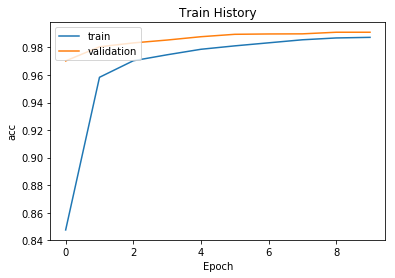

{'acc': [0.847479166649282,
  0.9583541594445706,
  0.9703750066459179,
  0.9747083440423012,
  0.9787083476781845,
  0.9811875142157078,
  0.9833958476781846,
  0.9856041796505451,
  0.9869375124573707,
  0.9873750120401382],
 'loss': [0.488669916568324,
  0.13636313006281853,
  0.0997816712828353,
  0.08148124186554924,
  0.06846866491250694,
  0.06066784526919946,
  0.0542930141906254,
  0.04723233079421334,
  0.04203242723015137,
  0.041007524722954256],
 'val_acc': [0.970250004529953,
  0.9805000111460686,
  0.983333344757557,
  0.9854166775941848,
  0.9878333434462547,
  0.9895833417773247,
  0.9898333415389061,
  0.9899166747927666,
  0.9910833418369294,
  0.9910833418369294],
 'val_loss': [0.09635946517810226,
  0.063223061861936,
  0.05139453299343586,
  0.04792754085501656,
  0.041311824205331506,
  0.0371223745518364,
  0.03566586235538125,
  0.0341158717405051,
  0.031965660926653074,
  0.030979079770622774]}

In [49]:
show_train_history(train_history,'acc','val_acc')
train_history.history

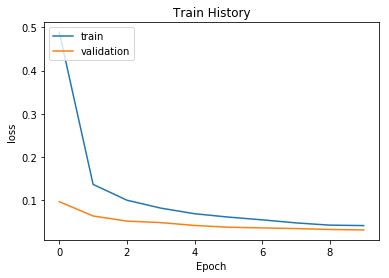

In [52]:
show_train_history(train_history,'loss','val_loss')

## *评估模型的准确率*

In [53]:
scores=model.evaluate(x_test4D_normalize,y_testonehot)
str(scores[1]*100)+'%'

10000/10000 [==============================] - 11s 1ms/step


'99.16%'

## *进行预测*

In [54]:
prediction=model.predict_classes(x_test4D_normalize)

In [55]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

### *显示前十项预测结果*

In [56]:
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):#num为要显示的数据项数默认为10
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)#子图形为5行5列
        
        ax.imshow(images[idx],cmap='binary')           
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

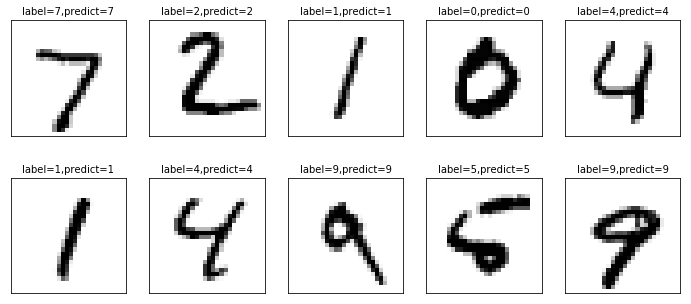

In [57]:
plot_images_labels_prediction(x_test,y_test,prediction,idx=0)

## *建立混淆矩阵*

In [58]:
import pandas as pd
pd.crosstab(y_test,prediction,
           rownames=["label"],colnames=['prediction'])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,0,3,1,0,0
1,0,1133,1,1,0,0,0,0,0,0
2,1,0,1028,0,0,0,0,3,0,0
3,0,0,1,1000,0,4,0,3,1,1
4,0,0,0,0,976,0,0,1,0,5
5,1,0,0,4,0,885,1,0,0,1
6,2,2,0,0,1,4,949,0,0,0
7,1,3,1,0,0,0,0,1019,1,3
8,1,0,2,3,0,3,1,3,957,4
